# Data Preprocessing and Labelling

This performing data preprocessing and labelling tasks on the provided datasets.

## Task Description

The task involves three main steps:

1. **Data Cleaning**: Identifying and correcting errors, inconsistencies, and incomplete entries within the dataset to improve its quality and usability.
2. **Data Encoding**: Converting categorical or text data into a numerical format that can be easily processed by machine learning algorithms.
3. **Data Labelling**: Assigning meaningful labels or categories to data instances, typically for supervised learning tasks.

## How to Use

1. **Data Cleaning**:
   - This script handles missing data, removes duplicates, corrects errors, standardizes data, and removes outliers.

2. **Data Encoding**:
   - This script employs one-hot encoding for categorical variables and ensures consistency in data representation.

3. **Data Labelling**:
   - This script involves manual labelling based on predefined criteria and quality assurance checks.

## Dependencies

- Python 3
- pandas
- scikit-learn


## About Dataset

* The dataset is sourced from the official portal of Freddie Mac for home loans.
* It comprises 291,452 data points and 28 columns or parameters representing various features of the data.
* The data provides detailed information about each loan, including borrower characteristics, loan terms, property details, and loan performance indicators.

* **Below are descriptions of some features found in the dataset:**

    1. **CreditScore**: The credit score of the borrower.
    2. **FirstPaymentDate**: The date of the first payment on the mortgage.
    3. **FirstTimeHomebuyer**: A binary indicator (Y/N) indicating whether the borrower is a first-time homebuyer.
    4. **MaturityDate**: The date when the mortgage matures.
    5. **MSA (Metropolitan Statistical Area)**: A code representing the metropolitan statistical area where the property is located.
    6. **MIP (Mortgage Insurance Premium)**: The mortgage insurance premium amount.
    7. **Units**: The number of units in the property (e.g., single-family, multi-family).
    8. **Occupancy**: The occupancy status of the property (e.g., Owner-occupied, Investment property).
    9. **OCLTV (Original Combined Loan-to-Value Ratio)**: The original combined loan-to-value ratio at the time of origination.
    10. **DTI (Debt-to-Income Ratio)**: The debt-to-income ratio of the borrower.
    11. **OrigUPB (Original Unpaid Principal Balance)**: The original unpaid principal balance of the mortgage.
    12. **LTV (Loan-to-Value Ratio)**: The loan-to-value ratio of the mortgage.
    13. **OrigInterestRate**: The original interest rate of the mortgage.
    14. **Channel**: The channel through which the mortgage was originated (e.g., Retail, Broker).
    15. **PPM (Prepayment Penalty Mortgage)**: A binary indicator (Y/N) indicating whether the mortgage has a prepayment penalty.
    16. **ProductType**: The type of mortgage product (e.g., Fixed-rate Mortgage, Adjustable-rate Mortgage).
    17. **PropertyState**: The state where the property is located.
    18. **PropertyType**: The type of property (e.g., Single-family, Condo).
    19. **PostalCode**: The postal code of the property location.
    20. **LoanSeqNum**: A unique identifier for the loan sequence.
    21. **LoanPurpose**: The purpose of the loan (e.g., Purchase, Refinance).
    22. **OrigLoanTerm**: The original term of the loan in months.
    23. **NumBorrowers**: The number of borrowers on the mortgage.
    24. **SellerName**: The name of the seller of the mortgage.
    25. **ServicerName**: The name of the servicer handling the mortgage.
    26. **EverDelinquent**: A binary indicator (0/1) indicating whether the mortgage has ever been delinquent.
    27. **MonthsDelinquent**: The number of months the mortgage has been delinquent.
    28. **MonthsInRepayment**: The number of months the mortgage has been in repayment.



## **Step 1:** *Import Libraries*

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

## **Step 2:** *Load Data*

In [77]:
path = r'MortgageLoanExport\LoanExport.csv'
df = pd.read_csv(path, low_memory=False)

In [78]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [79]:
df.shape

(291451, 28)

In [80]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

## **Step 3:** *Checking for missing values*

> <font color="pink">The output indicates the number of missing values (null values) for each column in the DataFrame. Only the `SellerName` column has missing values, with `24,994`entries being null, while all other columns have no missing values.</font>
 

In [82]:
df.isnull().sum()

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

## **Step 4:** *Find the number of unique value and datatypes in dataset*

In [83]:
df.nunique()

CreditScore              370
FirstPaymentDate          66
FirstTimeHomebuyer         3
MaturityDate              96
MSA                      392
MIP                       37
Units                      5
Occupancy                  3
OCLTV                    102
DTI                       66
OrigUPB                  375
LTV                       97
OrigInterestRate         254
Channel                    4
PPM                        3
ProductType                1
PropertyState             53
PropertyType               7
PostalCode               892
LoanSeqNum            291451
LoanPurpose                3
OrigLoanTerm              61
NumBorrowers               3
SellerName                20
ServicerName              20
EverDelinquent             2
MonthsDelinquent         174
MonthsInRepayment        212
dtype: int64

In [84]:
df.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [85]:
for name, cnt, dt in zip(df.columns, df.nunique(), df.dtypes):
    print(f"{name:<20} {cnt:<7} {dt}")

CreditScore          370     int64
FirstPaymentDate     66      int64
FirstTimeHomebuyer   3       object
MaturityDate         96      int64
MSA                  392     object
MIP                  37      int64
Units                5       int64
Occupancy            3       object
OCLTV                102     int64
DTI                  66      int64
OrigUPB              375     int64
LTV                  97      int64
OrigInterestRate     254     float64
Channel              4       object
PPM                  3       object
ProductType          1       object
PropertyState        53      object
PropertyType         7       object
PostalCode           892     object
LoanSeqNum           291451  object
LoanPurpose          3       object
OrigLoanTerm         61      int64
NumBorrowers         3       object
SellerName           20      object
ServicerName         20      object
EverDelinquent       2       int64
MonthsDelinquent     174     int64
MonthsInRepayment    212     int64


## **Step 5:** *Fix datatype*

In [86]:
def convert_to_datetime(x):
    return pd.to_datetime(str(x), format='%Y%m')

In [87]:
# fix FirstPaymentDate column datatype
df['FirstPaymentDate'] = df['FirstPaymentDate'].apply(convert_to_datetime)

In [88]:
# Fix MaturityDate columns
df['MaturityDate'] = df['MaturityDate'].apply(convert_to_datetime)

In [89]:
df.dtypes

CreditScore                    int64
FirstPaymentDate      datetime64[ns]
FirstTimeHomebuyer            object
MaturityDate          datetime64[ns]
MSA                           object
MIP                            int64
Units                          int64
Occupancy                     object
OCLTV                          int64
DTI                            int64
OrigUPB                        int64
LTV                            int64
OrigInterestRate             float64
Channel                       object
PPM                           object
ProductType                   object
PropertyState                 object
PropertyType                  object
PostalCode                    object
LoanSeqNum                    object
LoanPurpose                   object
OrigLoanTerm                   int64
NumBorrowers                  object
SellerName                    object
ServicerName                  object
EverDelinquent                 int64
MonthsDelinquent               int64
M

## **Step 6:** *Feature Engineering*

In [90]:
data = df.copy()

In [91]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [92]:
temp1 = pd.get_dummies(data['LoanPurpose'], prefix='LoanPurpose')
temp2 = pd.get_dummies(data['FirstTimeHomebuyer'], prefix='FirstTimeHomebuyer')

In [93]:
df = pd.concat([data, temp1], axis=1)
df=pd.concat([df, temp2], axis =1)

In [94]:
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,Channel,PPM,ProductType,PropertyState,PropertyType,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_N,FirstTimeHomebuyer_X,FirstTimeHomebuyer_Y
0,0,1999-02-01,N,2029-01-01,16974,25,1,O,89,27,117000,89,6.750,T,N,FRM,IL,SF,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52,False,False,True,True,False,False
1,0,1999-02-01,N,2029-01-01,19740,0,1,O,73,17,109000,73,6.500,R,N,FRM,CO,SF,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144,False,True,False,True,False,False
2,0,1999-02-01,N,2029-01-01,29940,0,1,O,75,16,88000,75,6.875,T,N,FRM,KS,SF,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67,False,True,False,True,False,False
3,0,1999-02-01,N,2029-01-01,31084,0,1,O,76,14,160000,76,6.875,R,N,FRM,CA,SF,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35,False,True,False,True,False,False
4,0,1999-02-01,N,2029-01-01,35644,0,1,O,78,18,109000,78,7.125,R,N,FRM,NJ,SF,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,1999-03-01,N,2029-02-01,37964,0,1,O,60,32,90000,60,7.000,R,N,FRM,PA,SF,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12,False,True,False,True,False,False
291447,840,2002-10-01,N,2029-04-01,35644,0,1,O,73,0,267000,73,6.375,C,N,FRM,NY,SF,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53,False,False,True,True,False,False
291448,840,2003-04-01,N,2029-04-01,42044,0,1,O,73,31,87000,73,5.625,R,N,FRM,CA,SF,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38,False,True,False,True,False,False
291449,845,1999-04-01,N,2029-03-01,37964,0,1,I,80,54,88000,80,7.000,R,N,FRM,PA,SF,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32,False,False,True,True,False,False


In [95]:
# Eliminating useless features
columns_to_drop = [
    'FirstTimeHomebuyer',
    'FirstTimeHomebuyer_Y',
    'FirstTimeHomebuyer_N',
    'ServicerName',
    'SellerName',
    'NumBorrowers',
    'PropertyType',
    'PropertyState',
    'ProductType',
    'PPM',
    'Channel',
    'Occupancy',
    'MSA',
    'MaturityDate',
    'FirstPaymentDate',
    'LoanPurpose',
    'PostalCode',
    'LoanSeqNum'
]

df.drop(columns_to_drop, inplace=True, axis=1)

In [96]:
df

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,False,False,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,False,True,False,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,False,True,False,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,False,True,False,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,0,1,60,32,90000,60,7.000,360,0,0,12,False,True,False,False
291447,840,0,1,73,0,267000,73,6.375,319,0,0,53,False,False,True,False
291448,840,0,1,73,31,87000,73,5.625,313,0,0,38,False,True,False,False
291449,845,0,1,80,54,88000,80,7.000,360,0,0,32,False,False,True,False


In [97]:
df.shape

(291451, 16)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CreditScore           291451 non-null  int64  
 1   MIP                   291451 non-null  int64  
 2   Units                 291451 non-null  int64  
 3   OCLTV                 291451 non-null  int64  
 4   DTI                   291451 non-null  int64  
 5   OrigUPB               291451 non-null  int64  
 6   LTV                   291451 non-null  int64  
 7   OrigInterestRate      291451 non-null  float64
 8   OrigLoanTerm          291451 non-null  int64  
 9   EverDelinquent        291451 non-null  int64  
 10  MonthsDelinquent      291451 non-null  int64  
 11  MonthsInRepayment     291451 non-null  int64  
 12  LoanPurpose_C         291451 non-null  bool   
 13  LoanPurpose_N         291451 non-null  bool   
 14  LoanPurpose_P         291451 non-null  bool   
 15  

In [99]:
# Convert boolean columns to numerical
df['LoanPurpose_C'] = df['LoanPurpose_C'].astype(int)
df['LoanPurpose_N'] = df['LoanPurpose_N'].astype(int)
df['LoanPurpose_P'] = df['LoanPurpose_P'].astype(int)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CreditScore           291451 non-null  int64  
 1   MIP                   291451 non-null  int64  
 2   Units                 291451 non-null  int64  
 3   OCLTV                 291451 non-null  int64  
 4   DTI                   291451 non-null  int64  
 5   OrigUPB               291451 non-null  int64  
 6   LTV                   291451 non-null  int64  
 7   OrigInterestRate      291451 non-null  float64
 8   OrigLoanTerm          291451 non-null  int64  
 9   EverDelinquent        291451 non-null  int64  
 10  MonthsDelinquent      291451 non-null  int64  
 11  MonthsInRepayment     291451 non-null  int64  
 12  LoanPurpose_C         291451 non-null  int32  
 13  LoanPurpose_N         291451 non-null  int32  
 14  LoanPurpose_P         291451 non-null  int32  
 15  

In [101]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,False


In [102]:
df.isnull().sum()

CreditScore             0
MIP                     0
Units                   0
OCLTV                   0
DTI                     0
OrigUPB                 0
LTV                     0
OrigInterestRate        0
OrigLoanTerm            0
EverDelinquent          0
MonthsDelinquent        0
MonthsInRepayment       0
LoanPurpose_C           0
LoanPurpose_N           0
LoanPurpose_P           0
FirstTimeHomebuyer_X    0
dtype: int64

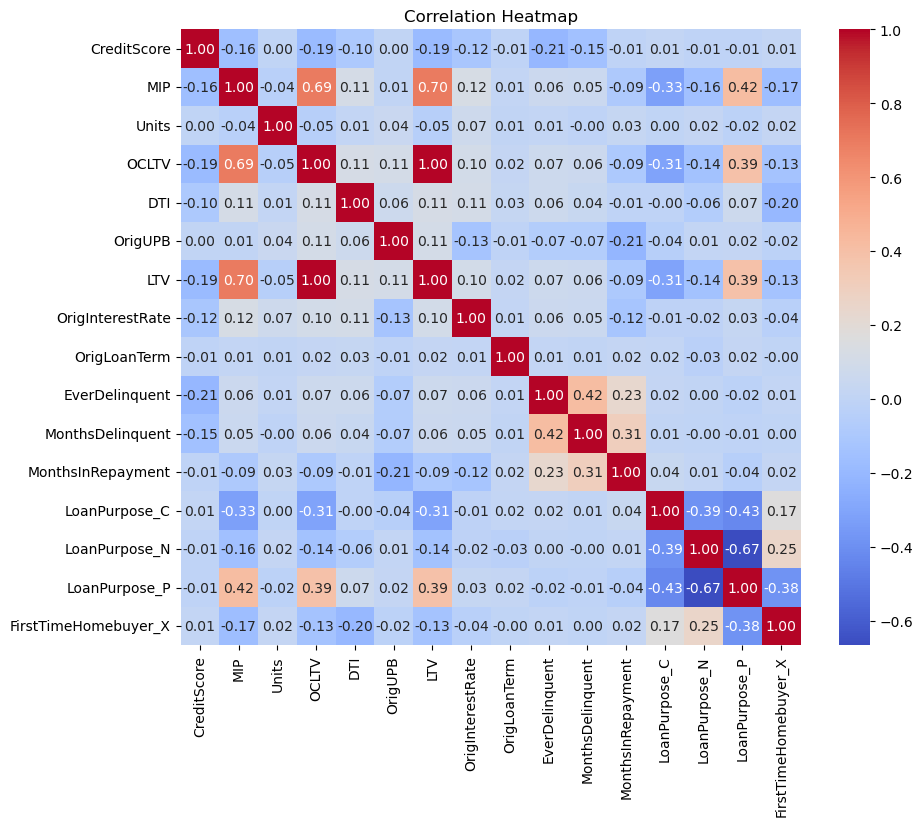

In [103]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

### Perform some more feature engineering

In [104]:
# Define the function to calculate credit range
def calculate_credit_range(score):
    return 'excellent' if score >= 750 else 'good' if score >= 700 else 'fair' if score >= 650 else 'poor'

# Apply the function using list comprehension within apply
df['CreditRange'] = df['CreditScore'].apply(lambda x: calculate_credit_range(x))

In [105]:
# Define the function to calculate LTV range
def calculate_ltv_range(ltv):
    return 'low' if ltv < 75 else 'medium' if 75 <= ltv < 80 else 'high' if 80 <= ltv < 90 else 'very high'

# Apply the function using list comprehension within apply
df['LTVRange'] = df['LTV'].apply(lambda x: calculate_ltv_range(x))


In [106]:
# Define the function to calculate repayment range
def calculate_repay_range(rate):
    return 'low' if rate < 4 else 'medium' if 4 <= rate < 6 else 'high'

# Apply the function using list comprehension within apply
df['RepayRange'] = df['OrigInterestRate'].apply(lambda x: calculate_repay_range(x))

In [107]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,CreditRange,LTVRange,RepayRange
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,False,poor,high,high
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,False,poor,low,high
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,False,poor,medium,high
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,False,poor,medium,high
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,False,poor,medium,high


#### convert categorical ranges to numerical features

In [108]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['LTVRange']= label_encoder.fit_transform(df['LTVRange'])

In [109]:
# convert categorical ranges to numerical features
credit_range_dummies = pd.get_dummies(df['CreditRange'], prefix='CreditRange')
repay_range_dummies = pd.get_dummies(df['RepayRange'], prefix='RepayRange')

In [110]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,CreditRange,LTVRange,RepayRange
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,False,poor,0,high
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,False,poor,1,high
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,False,poor,2,high
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,False,poor,2,high
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,False,poor,2,high


In [111]:
# concatenate the newly created numerical features to the original data
df = pd.concat([df, credit_range_dummies, repay_range_dummies], axis=1)

In [112]:
df.head()


,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,CreditRange,LTVRange,RepayRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,False,poor,0,high,False,False,False,True,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,False,poor,1,high,False,False,False,True,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,False,poor,2,high,False,False,False,True,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,False,poor,2,high,False,False,False,True,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,False,poor,2,high,False,False,False,True,True,False


In [113]:
# drop the original categorical ranges
df = df.drop(['CreditRange', 'RepayRange'], axis=1)

In [114]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,False,0,False,False,False,True,True,False
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,False,1,False,False,False,True,True,False
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,False,2,False,False,False,True,True,False
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,False,2,False,False,False,True,True,False
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,False,2,False,False,False,True,True,False


In [115]:
# Convert boolean columns to numerical
df['CreditRange_excellent'] = df['CreditRange_excellent'].astype(int)
df['CreditRange_fair'] = df['CreditRange_fair'].astype(int)
df['CreditRange_good'] = df['CreditRange_good'].astype(int)
df['CreditRange_poor'] = df['CreditRange_poor'].astype(int)
df['RepayRange_high'] = df['RepayRange_high'].astype(int)
df['RepayRange_medium'] = df['RepayRange_medium'].astype(int)

In [116]:
df['FirstTimeHomebuyer_X'] = df['FirstTimeHomebuyer_X'].astype(int)

In [117]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000,89,6.750,360,0,0,52,0,0,1,0,0,0,0,0,1,1,0
1,0,0,1,73,17,109000,73,6.500,360,0,0,144,0,1,0,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000,75,6.875,360,0,0,67,0,1,0,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000,76,6.875,360,0,0,35,0,1,0,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000,78,7.125,360,0,0,54,0,1,0,0,2,0,0,0,1,1,0


In [118]:
df.shape

(291451, 23)

## **Step 7:** *Check and Handle Outliers*

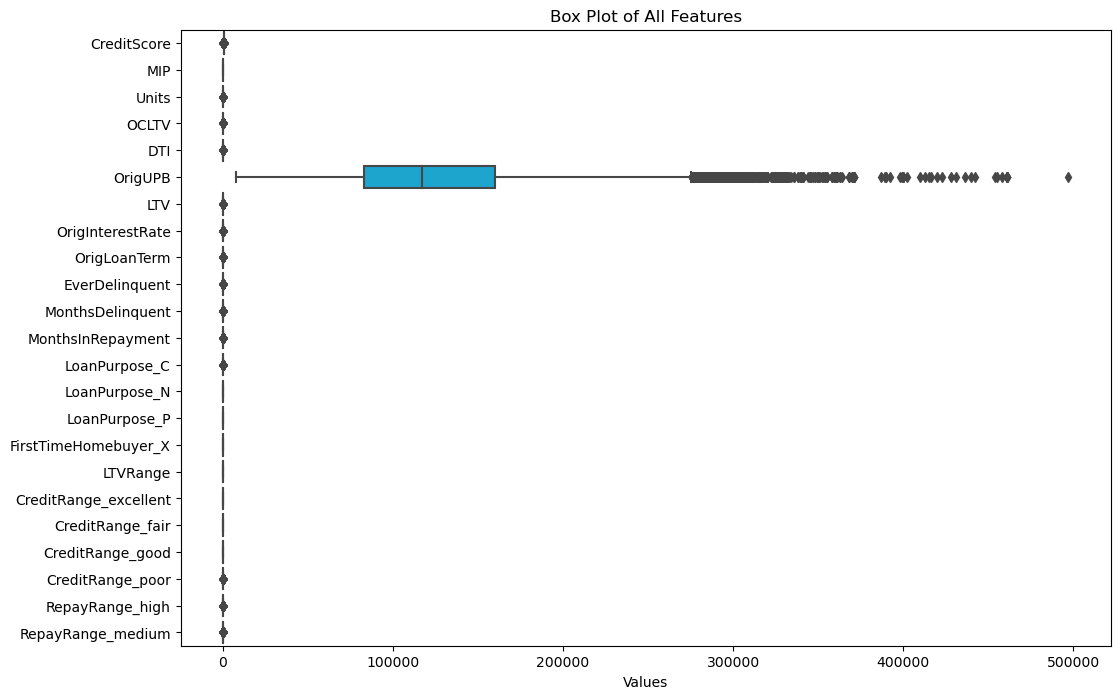

In [119]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.title('Box Plot of All Features')
plt.xlabel('Values')
plt.show()

In [120]:
df.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_X', 'LTVRange',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'RepayRange_high', 'RepayRange_medium'],
      dtype='object')

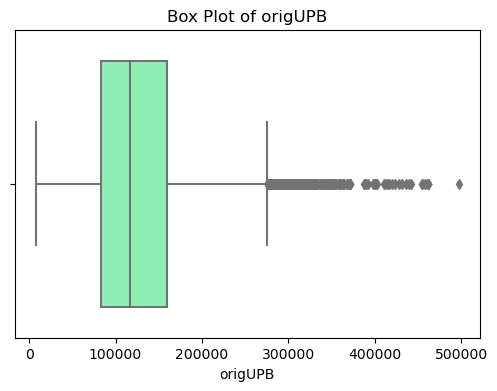

In [121]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigUPB'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

In [122]:
sorted(df.OrigUPB)
Q1, Q3=df.OrigUPB.quantile([0.25, 0.75])
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df['OrigUPB']=np.where(data['OrigUPB']>upper, upper,data['OrigUPB'])
df['OrigUPB']=np.where(data['OrigUPB']<lower, lower,data['OrigUPB'])

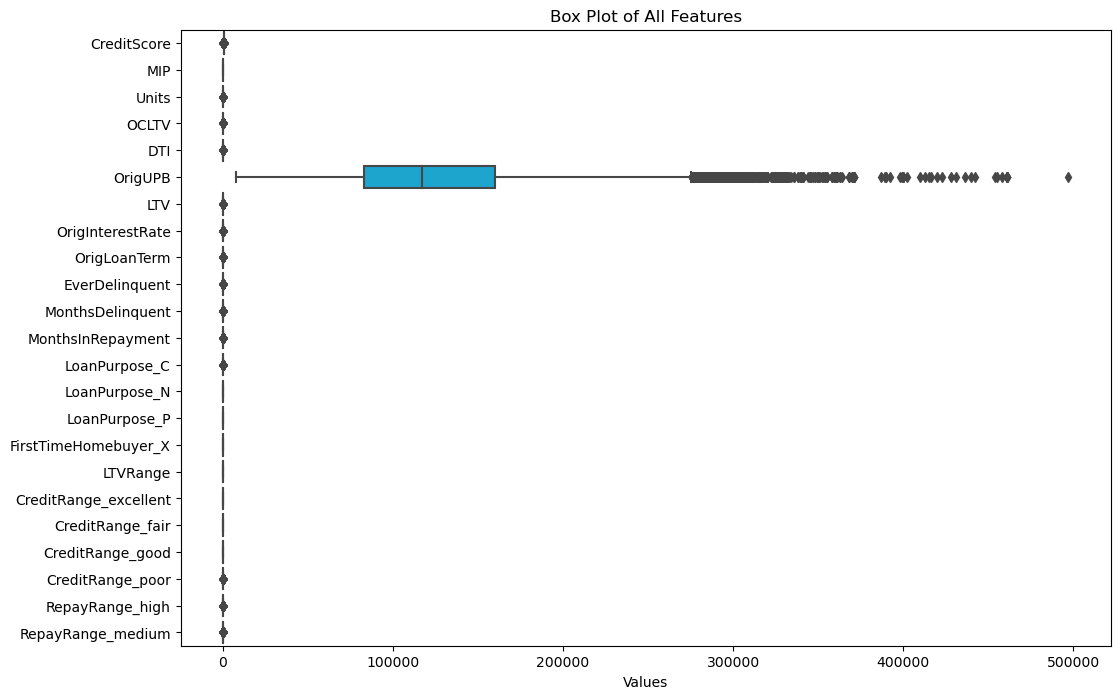

In [123]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='rainbow', orient='h')
plt.title('Box Plot of All Features')
plt.xlabel('Values')
plt.show()

In [124]:
df['OrigUPB']

0         117000.0
1         109000.0
2          88000.0
3         160000.0
4         109000.0
            ...   
291446     90000.0
291447    267000.0
291448     87000.0
291449     88000.0
291450     70000.0
Name: OrigUPB, Length: 291451, dtype: float64

In [125]:
df.OrigInterestRate

0         6.750
1         6.500
2         6.875
3         6.875
4         7.125
          ...  
291446    7.000
291447    6.375
291448    5.625
291449    7.000
291450    7.000
Name: OrigInterestRate, Length: 291451, dtype: float64

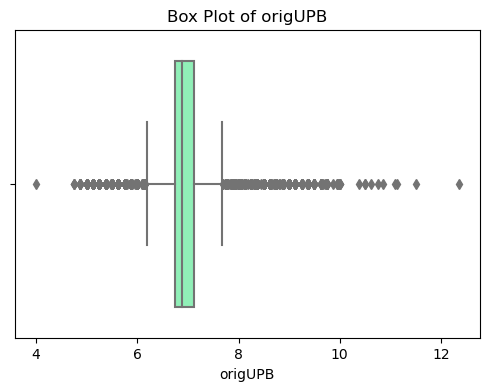

In [126]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigInterestRate'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

In [127]:
sorted(df.OrigInterestRate)
Q1, Q3=df.OrigInterestRate.quantile([0.25, 0.75])
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
df['OrigInterestRate']=np.where(data['OrigInterestRate']>upper, upper,data['OrigInterestRate'])
df['OrigInterestRate']=np.where(data['OrigInterestRate']<lower, lower,data['OrigInterestRate'])

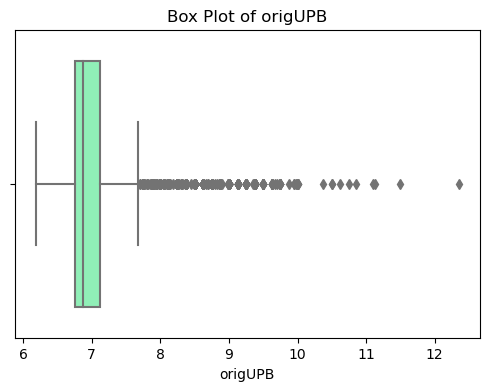

In [128]:
# Plotting the box plot for 'origUPB' column
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['OrigInterestRate'], palette='rainbow')
plt.title('Box Plot of origUPB')
plt.xlabel('origUPB')
plt.show()

## **Step 8:** *Check Duplicated Row and drop them*

In [129]:
df[df.duplicated()]

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
12367,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,0,2,0,0,0,1,1,0
12368,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,0,2,0,0,0,1,1,0
12369,617,0,1,76,56,90000.0,76,8.125,354,0,0,58,0,0,1,0,2,0,0,0,1,1,0
16061,624,0,1,47,39,34000.0,47,7.625,360,0,0,45,0,1,0,0,1,0,0,0,1,1,0
46842,656,25,1,90,27,48000.0,90,8.250,360,0,0,41,0,0,1,1,3,0,1,0,0,1,0
56269,663,0,2,69,35,80000.0,69,7.250,360,0,0,195,0,1,0,0,1,0,1,0,0,1,0
59713,666,0,1,70,4,69000.0,70,7.375,360,1,1,56,0,1,0,0,1,0,1,0,0,1,0
59714,666,0,1,70,4,69000.0,70,7.375,360,1,1,56,0,1,0,0,1,0,1,0,0,1,0
59994,666,0,1,71,3,51000.0,71,7.375,360,1,1,61,0,1,0,0,1,0,1,0,0,1,0
71495,674,30,1,95,39,105000.0,95,6.875,360,0,0,54,0,0,1,0,3,0,1,0,0,1,0


In [130]:
df=df.drop_duplicates()
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000.0,89,6.750,360,0,0,52,0,0,1,0,0,0,0,0,1,1,0
1,0,0,1,73,17,109000.0,73,6.500,360,0,0,144,0,1,0,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000.0,75,6.875,360,0,0,67,0,1,0,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000.0,76,6.875,360,0,0,35,0,1,0,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000.0,78,7.125,360,0,0,54,0,1,0,0,2,0,0,0,1,1,0


In [131]:
df.shape

(291404, 23)

In [132]:
df.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,LoanPurpose_P,FirstTimeHomebuyer_X,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,CreditRange_poor,RepayRange_high,RepayRange_medium
0,0,25,1,89,27,117000.0,89,6.750,360,0,0,52,0,0,1,0,0,0,0,0,1,1,0
1,0,0,1,73,17,109000.0,73,6.500,360,0,0,144,0,1,0,0,1,0,0,0,1,1,0
2,0,0,1,75,16,88000.0,75,6.875,360,0,0,67,0,1,0,0,2,0,0,0,1,1,0
3,0,0,1,76,14,160000.0,76,6.875,360,0,0,35,0,1,0,0,2,0,0,0,1,1,0
4,0,0,1,78,18,109000.0,78,7.125,360,0,0,54,0,1,0,0,2,0,0,0,1,1,0


## **Step 9:** *Check Correlation and drop some columns*

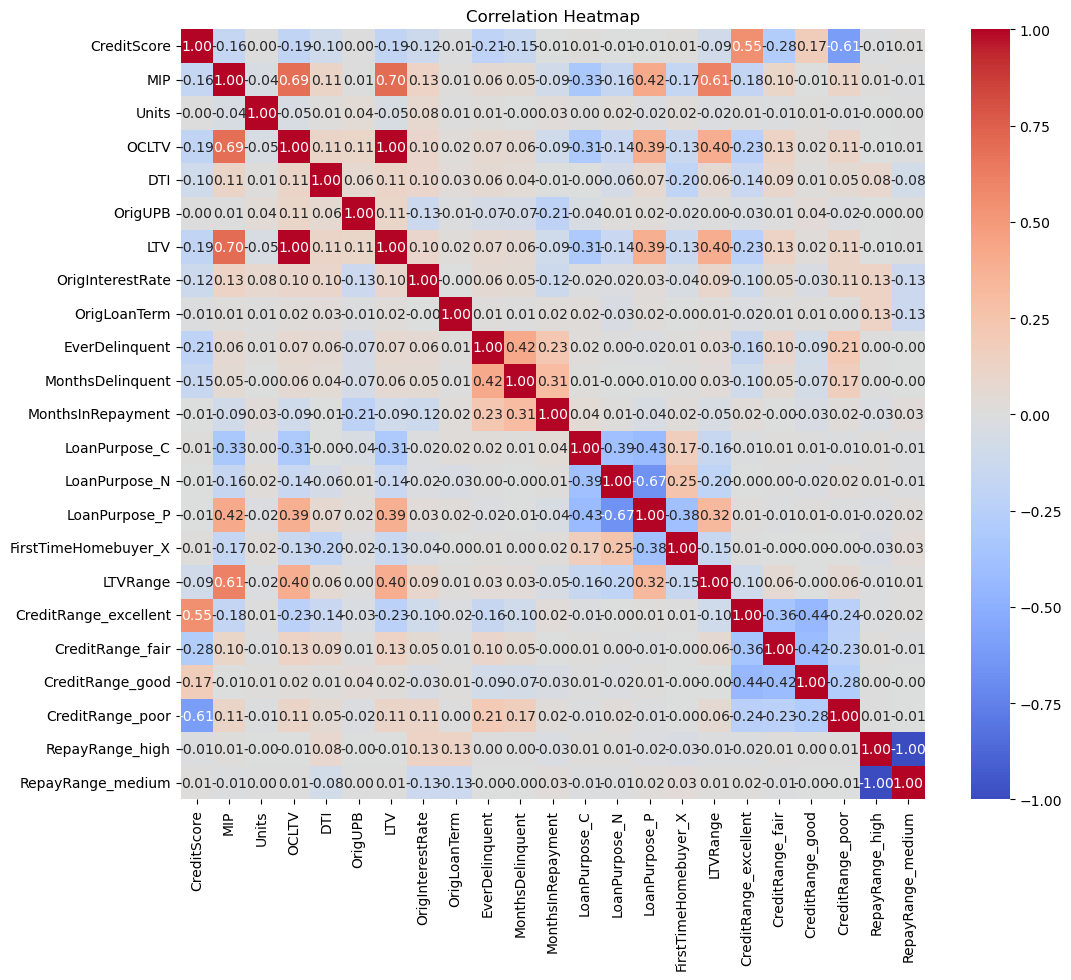

In [133]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

## **Step 10:** *Drop strongly corrolated columns*

In [134]:
df.columns

Index(['CreditScore', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment', 'LoanPurpose_C',
       'LoanPurpose_N', 'LoanPurpose_P', 'FirstTimeHomebuyer_X', 'LTVRange',
       'CreditRange_excellent', 'CreditRange_fair', 'CreditRange_good',
       'CreditRange_poor', 'RepayRange_high', 'RepayRange_medium'],
      dtype='object')

In [135]:
drop_columns = ["CreditScore", "MIP",'LTV', "RepayRange_high", "CreditRange_poor", ]
df.drop(drop_columns,axis=1,inplace=True)

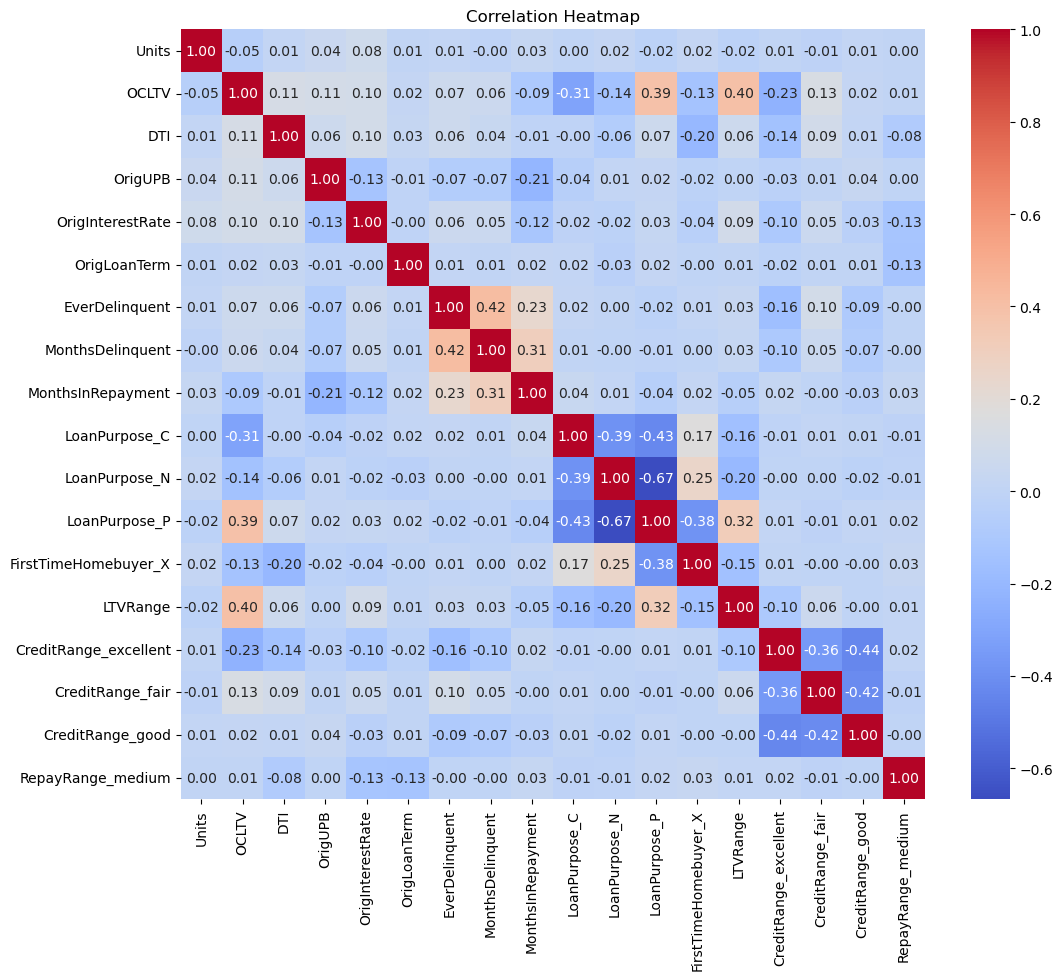

In [136]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [137]:
drop_columns = ["LoanPurpose_P"]
df.drop(drop_columns,axis=1,inplace=True)

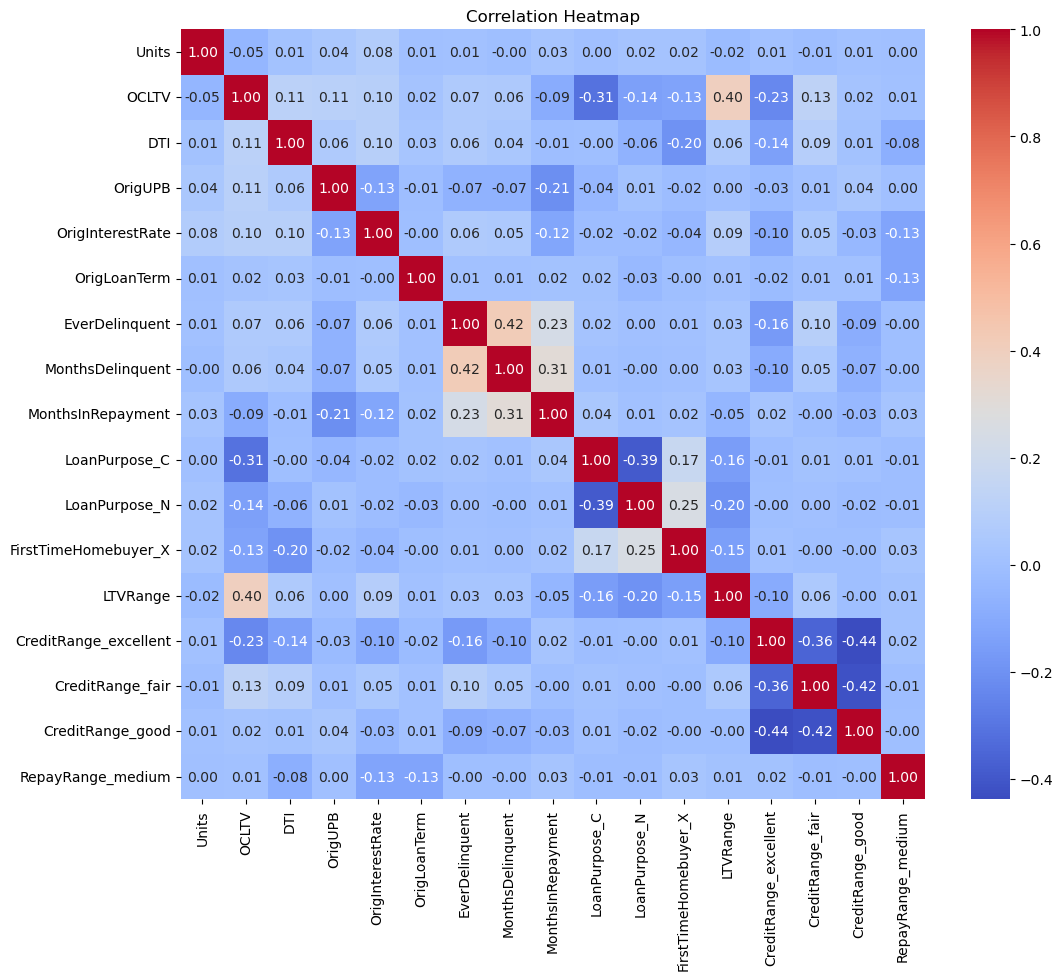

In [143]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [138]:
df.head()

,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,FirstTimeHomebuyer_X,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,RepayRange_medium
0,1,89,27,117000.0,6.750,360,0,0,52,0,0,0,0,0,0,0,0
1,1,73,17,109000.0,6.500,360,0,0,144,0,1,0,1,0,0,0,0
2,1,75,16,88000.0,6.875,360,0,0,67,0,1,0,2,0,0,0,0
3,1,76,14,160000.0,6.875,360,0,0,35,0,1,0,2,0,0,0,0
4,1,78,18,109000.0,7.125,360,0,0,54,0,1,0,2,0,0,0,0


In [139]:
df.EverDelinquent.unique()

array([0, 1], dtype=int64)

## **Step 11:** *Drop Null values* 

In [140]:
# Drop rows with null values
df.dropna(inplace=True)

In [141]:
df.isnull().sum()

Units                    0
OCLTV                    0
DTI                      0
OrigUPB                  0
OrigInterestRate         0
OrigLoanTerm             0
EverDelinquent           0
MonthsDelinquent         0
MonthsInRepayment        0
LoanPurpose_C            0
LoanPurpose_N            0
FirstTimeHomebuyer_X     0
LTVRange                 0
CreditRange_excellent    0
CreditRange_fair         0
CreditRange_good         0
RepayRange_medium        0
dtype: int64

In [142]:
df.head(20)

,Units,OCLTV,DTI,OrigUPB,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment,LoanPurpose_C,LoanPurpose_N,FirstTimeHomebuyer_X,LTVRange,CreditRange_excellent,CreditRange_fair,CreditRange_good,RepayRange_medium
0,1,89,27,117000.0,6.750,360,0,0,52,0,0,0,0,0,0,0,0
1,1,73,17,109000.0,6.500,360,0,0,144,0,1,0,1,0,0,0,0
2,1,75,16,88000.0,6.875,360,0,0,67,0,1,0,2,0,0,0,0
3,1,76,14,160000.0,6.875,360,0,0,35,0,1,0,2,0,0,0,0
4,1,78,18,109000.0,7.125,360,0,0,54,0,1,0,2,0,0,0,0
5,1,89,40,207000.0,7.125,360,0,0,42,0,1,0,0,0,0,0,0
6,1,90,21,111000.0,6.875,360,0,0,44,0,0,0,3,0,0,0,0
7,1,72,20,97000.0,6.750,360,1,3,145,0,1,1,1,0,0,0,0
8,1,95,38,55000.0,7.000,345,0,0,64,0,0,0,3,0,0,0,0
9,1,95,27,35000.0,7.125,360,1,104,212,0,0,0,3,0,0,0,0


## **Step 12:** *Save the clean dataframe* 

In [144]:
path = 'MortgageLoanExport\Clearn_LoanExport.csv'
df.to_csv(path)